# Review of available plotting commands {#basic_plotting}

This example lists the different plotting commands available, shown with
the arguments available.


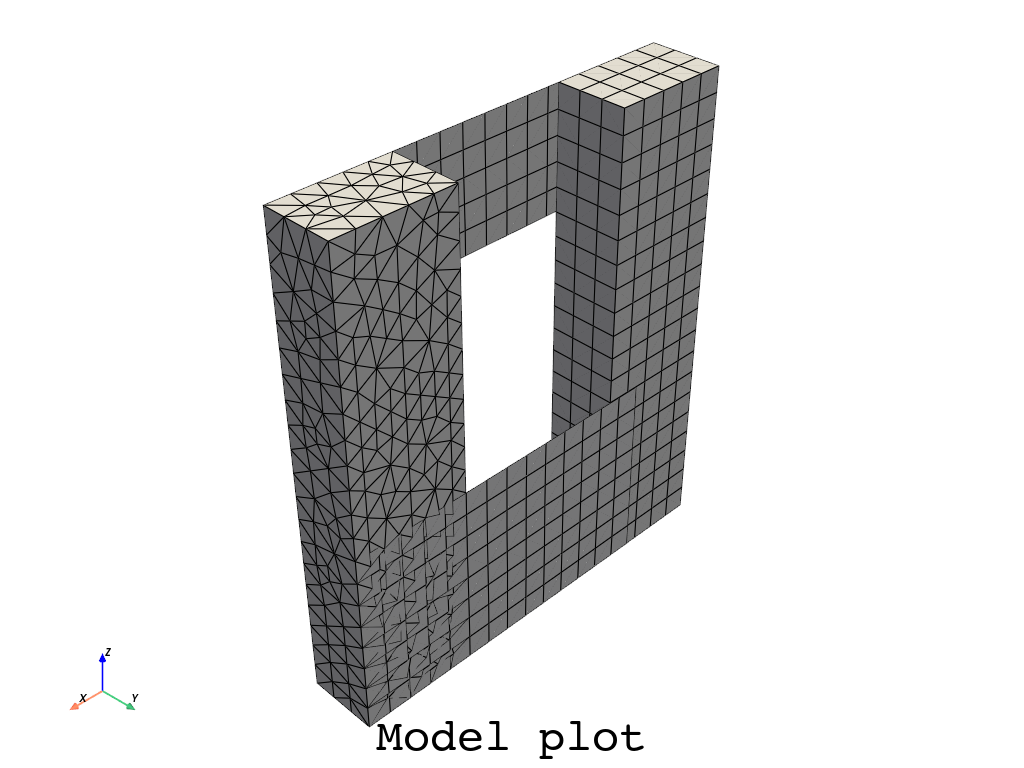

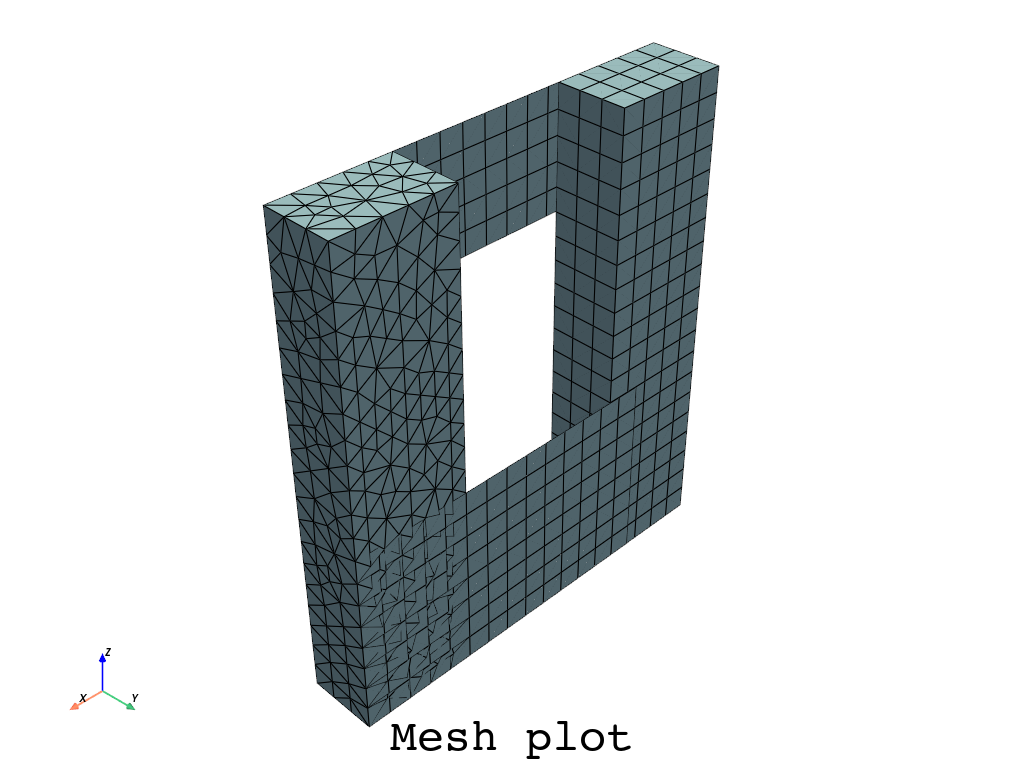

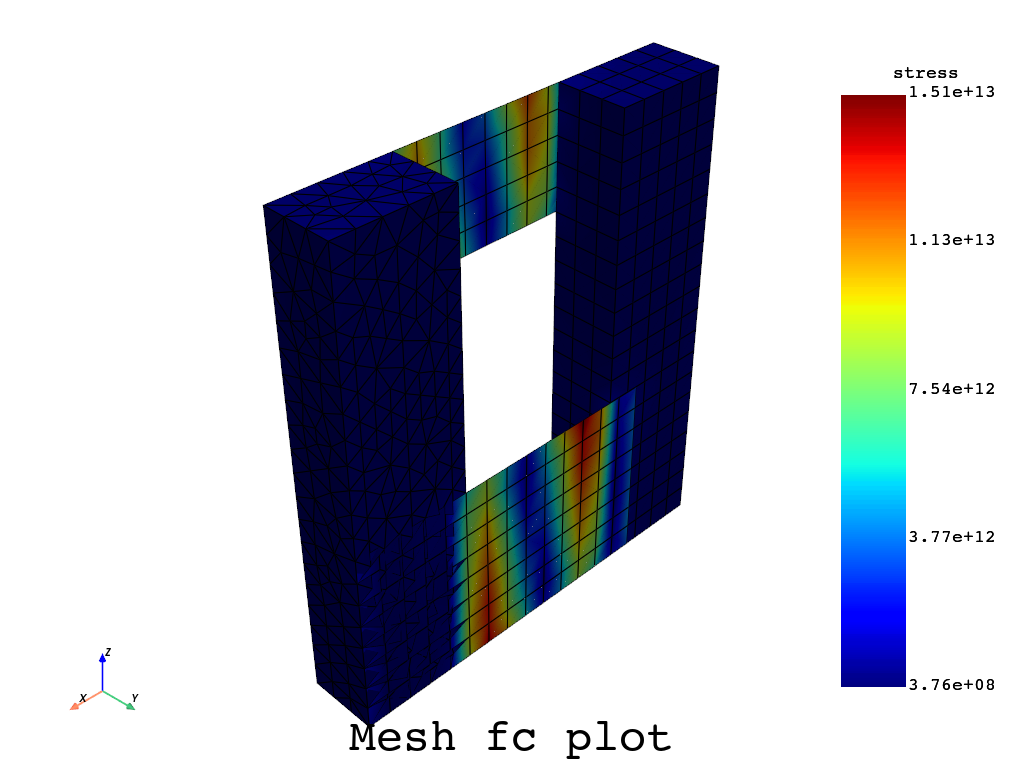

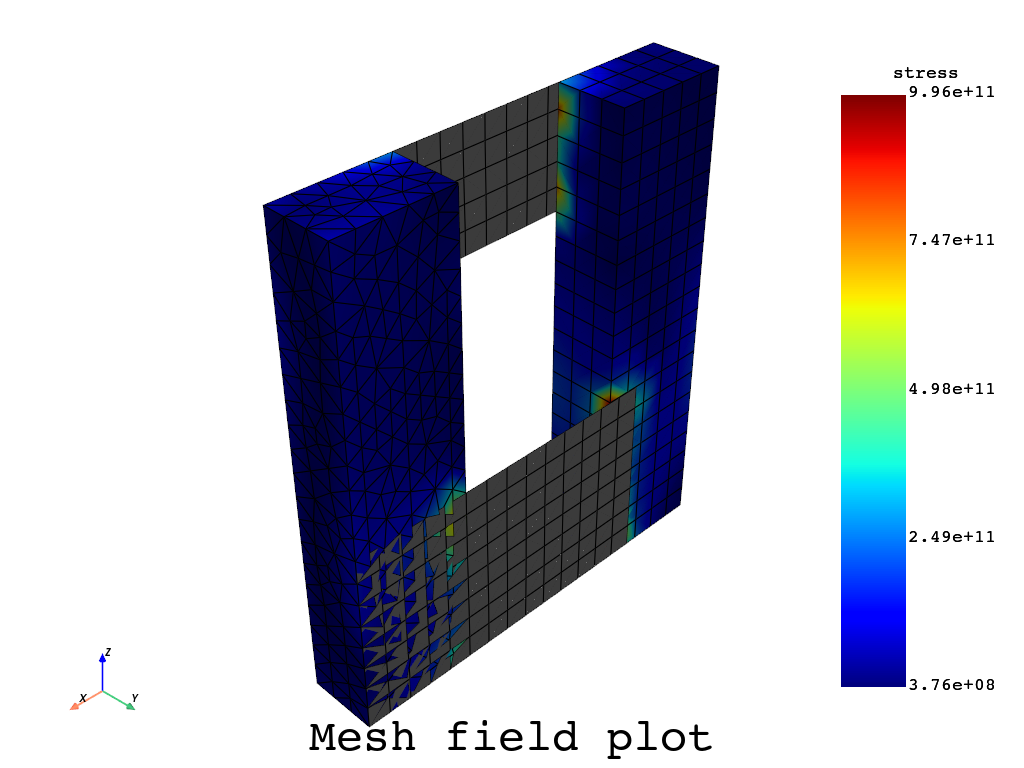

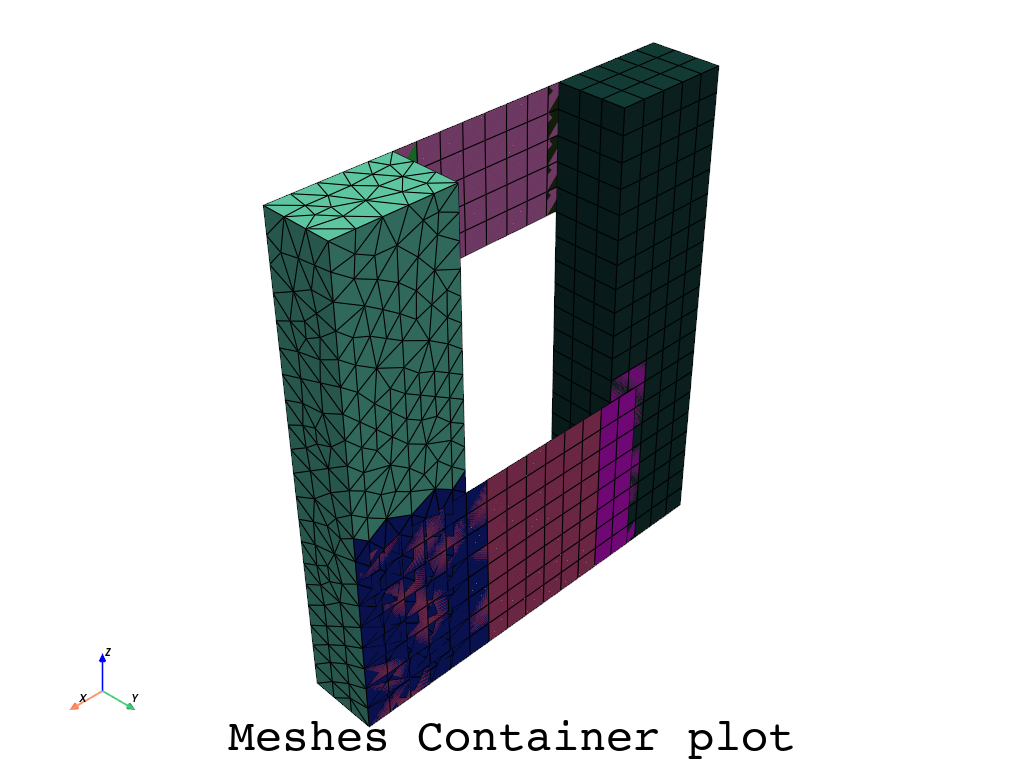

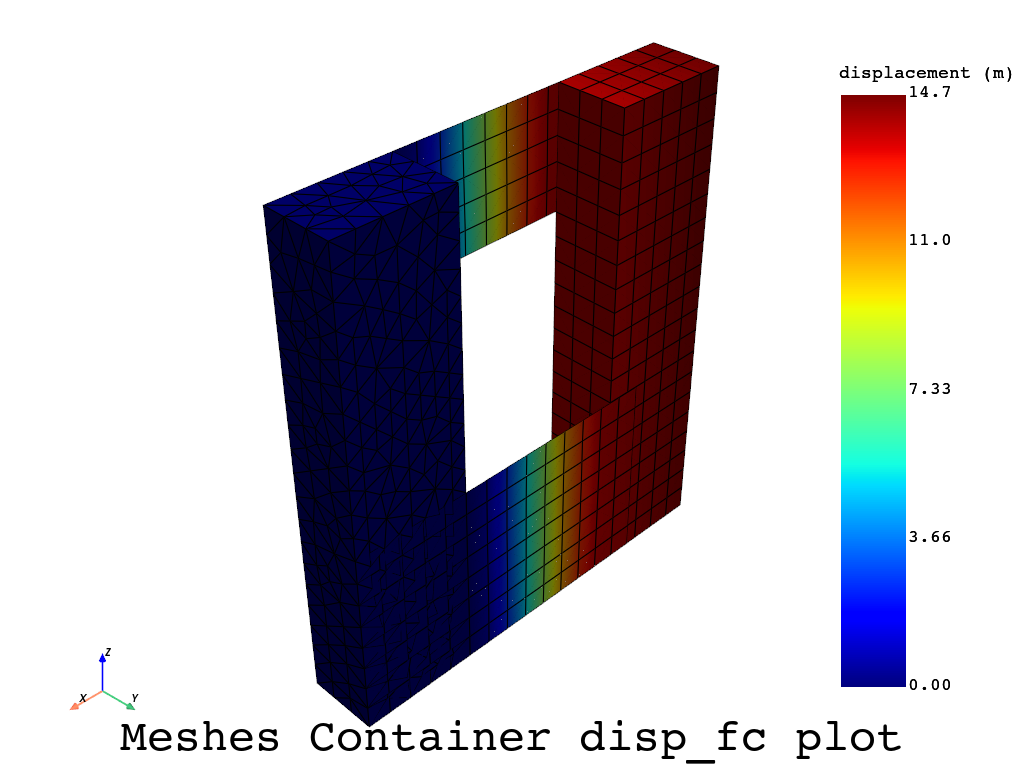

In [1]:
from ansys.dpf import core as dpf
from ansys.dpf.core import examples


# Plot the bare mesh of a model
model = dpf.Model(examples.find_multishells_rst())
model.plot(color="w", show_edges=True, title="Model", text="Model plot")
# # Additional PyVista kwargs are supported, such as:
model.plot(
    off_screen=True,
    notebook=False,
    screenshot="model_plot.png",
    title="Model",
    text="Model plot off",
    parallel_projection=True
)

# Notes:
# - To make screenshots, use "screenshot" as well as "notebook=False" if on a Jupyter notebook.
# - The "off_screen" keyword only works when "notebook=False" to prevent the GUI from appearing.


# Plot a field on its supporting mesh (field location must be Elemental or Nodal)
stress = model.results.stress()
stress.inputs.requested_location.connect(dpf.locations.nodal)
fc = stress.outputs.fields_container()
field = fc[0]
field.plot(notebook=False, shell_layers=None, show_axes=True, title="Field", text="Field plot")
# # Additional PyVista kwargs are supported, such as:
field.plot(
    off_screen=True,
    notebook=False,
    screenshot="field_plot.png",
    title="Field",
    text="Field plot off",
)
#
# # Alternatively one can plot the MeshedRegion associated to the model
mesh = model.metadata.meshed_region
mesh.plot(
    field_or_fields_container=None,
    shell_layers=None,
    show_axes=True,
    title="Mesh fc None",
    text="Mesh plot",
)
# Additional PyVista kwargs are supported, such as:
mesh.plot(
    off_screen=True,
    notebook=False,
    screenshot="mesh_plot.png",
    title="Mesh",
    text="Mesh plot off",
)
# A fields_container or a specific field can be given to plot on the mesh.
mesh.plot(
    field_or_fields_container=fc,
    title="Mesh with fields container",
    text="Mesh fc plot",
)
mesh.plot(field_or_fields_container=field, title="Mesh with field", text="Mesh field plot")


# ##############################################################################################
# # This next section requires a Premium context to be active du to the ``split_mesh`` operator.
# # Comment this last part to run the example as Entry.

# One can also plot a MeshesContainer. Here our mesh is split by material.
split_mesh_op = dpf.Operator("split_mesh")
split_mesh_op.connect(7, mesh)
split_mesh_op.connect(13, "mat")
meshes_cont = split_mesh_op.get_output(0, dpf.types.meshes_container)
meshes_cont.plot(title='Meshes Container', text='Meshes Container plot')
# A fields_container can be given as input, with results on each part of our split mesh.
disp_op = dpf.Operator("U")
disp_op.connect(7, meshes_cont)
ds = dpf.DataSources(examples.find_multishells_rst())
disp_op.connect(4, ds)
disp_fc = disp_op.outputs.fields_container()
meshes_cont.plot(disp_fc, title='Meshes Container disp_fc', text='Meshes Container disp_fc plot')
# Additional PyVista kwargs are supported, such as:
meshes_cont.plot(off_screen=True, notebook=False, screenshot='meshes_cont_plot.png',
                 title='Meshes Container', text='Meshes Container plot')